# Desarrollo Práctica 1

In [1]:
# Carga de librerías y lectura de base de datos
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Maritalstatus', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']

Predecir si los ingresos que superan los 50.000 $/año basándose en los datos del censo. También conocido como conjunto de datos "Census Income".

- age: Edad.
- workclass: tipo de trabajo ( privado, etc.)
- fnlwgt: Una estimación de la importancia de la persona en cuanto a su representatividad en relación entre la base de datos donde está. 
- education: Educaciones alcanzadas.
- education-num: # de educaciones.
- marital-status: Estado.
- occupation: Ocupación laboral.
- relationship: Relacion ( Casado, con hijos, etc.)
- race: Raza.
- sex: Sexo.
- capital-gain: Ganancias.
- capital-loss: Pérdidas.
- hours-per-week: Horas de trabajo por semana.
- native-country: País de procedencia

# 1) Evaluar la cantidad de datos null o NaN que hay por registro y por atributos

- Cantidad Null o NaN por atributos

In [2]:
data.isnull().sum()

Age                 0
Workclass        1836
Fnlwgt              0
Education           0
Education-num       0
Maritalstatus       0
Occupation       1843
Relationship        0
Race                0
Sex                 0
Capital-gain        0
Capital-loss        0
Hpw                 0
Country           583
C                   0
dtype: int64

In [3]:
(data.isnull().sum()/len(data))*100

Age              0.000000
Workclass        5.638647
Fnlwgt           0.000000
Education        0.000000
Education-num    0.000000
Maritalstatus    0.000000
Occupation       5.660146
Relationship     0.000000
Race             0.000000
Sex              0.000000
Capital-gain     0.000000
Capital-loss     0.000000
Hpw              0.000000
Country          1.790486
C                0.000000
dtype: float64

Como se logra ver, aunque hay datos faltantes estos representan entre el 2 y 6 % de los datos. Lo que podría implicar que al eliminarlos no afectaría tanto la base. Pero tendríamos que analizar que tanta influencia tienen los atributos en la etiqueta

- Cantidad Null o Nan por registros

In [4]:
print('Cantidad máxima faltante por registros:',max(data.isnull().sum(axis=1)))

Cantidad máxima faltante por registros: 3


In [5]:
print(' Cantidad de registros con datos faltantes :',len(data[data.isnull().any(1)]))
print('Porcentaje',round((len(data[data.isnull().any(1)])/ len(data))*100,2),'%')

tres = data [(data.Workclass.isnull() & data.Occupation.isnull() & data.Country.isnull())] # 27
print(' Cantidad de registros con 3 datos faltantes :',len(tres))
print('Porcentaje',round(((len(tres)/ len(data))*100),2),'%')


faltantes1 = data [(data.Workclass.isnull() & data.Occupation.isnull() & data.Country.notnull()) ] # 1809
#faltantes2 = data [(data.Workclass.isnull() & data.Country.isnull() & data.Occupation.notnull())] DA CERO
#faltantes3 = data [(data.Occupation.isnull() & data.Country.isnull() &  data.Workclass.notnull())] DA CERO
dos = len(faltantes1)
print(' Cantidad de registros con 2 datos faltantes :',dos)
print('Porcentaje',round(((dos/ len(data))*100),2),'%')



#faltantes4 = data [(data.Workclass.isnull() & data.Occupation.notnull() & data.Country.notnull()) ] DA CERO
faltantes5 = data [(data.Workclass.notnull() & data.Country.isnull() & data.Occupation.notnull())] #556
faltantes6 = data [(data.Occupation.isnull() & data.Country.notnull() &  data.Workclass.notnull())] # 7
uno = len(faltantes5)+len(faltantes6)
print(' Cantidad de registros con 1 dato faltante :',uno)
print('Porcentaje',round((uno/ len(data))*100,2),'%')

 Cantidad de registros con datos faltantes : 2399
Porcentaje 7.37 %
 Cantidad de registros con 3 datos faltantes : 27
Porcentaje 0.08 %
 Cantidad de registros con 2 datos faltantes : 1809
Porcentaje 5.56 %
 Cantidad de registros con 1 dato faltante : 563
Porcentaje 1.73 %


In [6]:
#print('Indice de Registros de 3',tres.index.to_list)
#print('Indice de Registros de 2',faltantes1.index.to_list)

data = data.drop(index= data[data.isnull().any(1)].index)
data

,Age,Workclass,Fnlwgt,Education,Education-num,Maritalstatus,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


- Asignar un valor entero a las categorías de los atributos categóricos

In [7]:
data["Workclass"] = pd.factorize(data["Workclass"])[0]
data["Education"] = pd.factorize(data["Education"])[0]
data["Maritalstatus"] = pd.factorize(data["Maritalstatus"])[0]
data["Occupation"] = pd.factorize(data["Occupation"])[0]
data["Relationship"] = pd.factorize(data["Relationship"])[0]
data["Race"] = pd.factorize(data["Race"])[0]
data["Sex"] = pd.factorize(data["Sex"])[0]
data["Country"] = pd.factorize(data["Country"])[0]
data["C"] = pd.factorize(data["C"])[0]
data

,Age,Workclass,Fnlwgt,Education,Education-num,Maritalstatus,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,6,12,1,9,2,0,1,0,0,38,0,0
32557,40,2,154374,1,9,1,8,1,0,0,0,0,40,0,1
32558,58,2,151910,1,9,6,0,4,0,1,0,0,40,0,0
32559,22,2,201490,1,9,0,0,3,0,0,0,0,20,0,0


# 2) Conozcamos la relación de los atributos con las etiquetas

- Relación entre atributos

<AxesSubplot:>

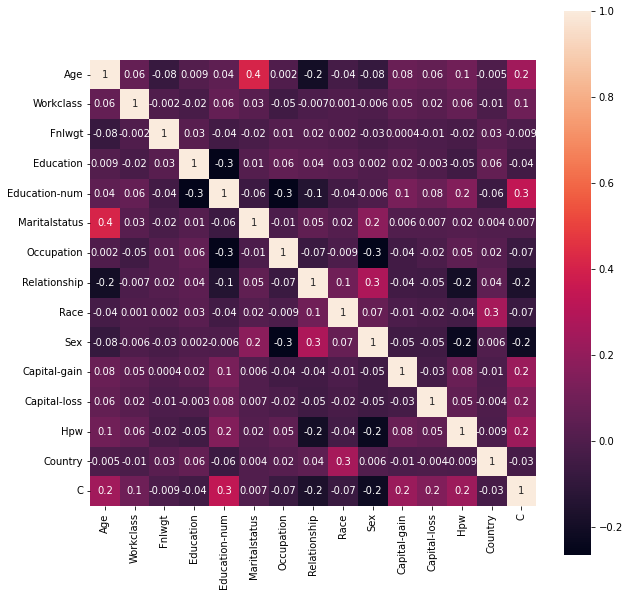

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), square=True, annot=True, ax=ax,fmt=".1g")

De aquí, se puede concluir que ningún atributo tiene relación con otro, por ende, no se puede borrar algún atributo

In [9]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,Age,Workclass,Fnlwgt,Education,Education-num,Maritalstatus,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.109343,1.897938e+05,3.424607,10.121312,1.075061,4.615609,1.523971,0.211823,0.324315,1092.007858,88.372489,40.931238,1.183509,0.248922
std,13.134665,0.934785,1.056530e+05,3.479777,2.549995,1.217557,3.432195,1.431980,0.612461,0.468126,7406.346497,404.298370,11.979984,4.947070,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,5.000000,13.000000,1.000000,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


- Relación entre atributo y etiquetas

In [10]:
data["Age"].corr (data["C"])

0.24199813626611855

# 3) Análisis de datos atípicos

In [11]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,Age,Workclass,Fnlwgt,Education,Education-num,Maritalstatus,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.109343,1.897938e+05,3.424607,10.121312,1.075061,4.615609,1.523971,0.211823,0.324315,1092.007858,88.372489,40.931238,1.183509,0.248922
std,13.134665,0.934785,1.056530e+05,3.479777,2.549995,1.217557,3.432195,1.431980,0.612461,0.468126,7406.346497,404.298370,11.979984,4.947070,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,5.000000,13.000000,1.000000,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


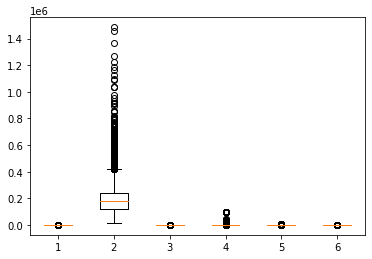

In [12]:
#Diagrama de cajas y bigotes para atributos numéricos

plt.boxplot((data['Age'],data['Fnlwgt'],data['Education-num'],data['Capital-gain'],data['Capital-loss'], data['Hpw']))
plt.show()

# 4) Verificar Desbalanceo

In [13]:
print(data['C'].value_counts())

0    22654
1     7508
Name: C, dtype: int64
